


# Step 1: Import and Preprocess the Dataset





In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/Housing.csv")

# Display basic info
print(df.head())
print(df.info())

# Drop rows with missing values for simplicity
df.dropna(inplace=True)

# Select features and target
X = df[['area', 'price', 'bathrooms']]  # Example features
y = df['airconditioning']  # Target variable


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu


# Step 2: Split data into train-test sets




In [24]:


from sklearn.model_selection import train_test_split

# Assuming X and y are already defined (from Step 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 436
Testing samples: 109



# Step 3: Fit a Linear Regression model



In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("/content/Housing.csv")  # Adjust path as needed

# Convert categorical target (if applicable)
if df['price'].dtype == 'object':
    df['price'] = df['price'].map({'yes': 1, 'no': 0})  # Only for binary target

# Select features and target
X = df[['airconditioning', 'bedrooms', 'bathrooms']]  # Choose your relevant numeric features
y = df['price']  # Target variable

# One-hot encode categorical features (if any)
X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Output for verification
print("Model trained successfully.")
print("Sample predictions:", y_pred[:5])


Model trained successfully.
Sample predictions: [5721341.61017873 6745074.9298477  3576498.31187028 5267172.81019635
 3909968.90119883]



#Step-4.Evaluate model using MAE, MSE, R^2



In [27]:


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 0.3546801588686892
Mean Squared Error (MSE): 0.1976358696635644
R² Score: 0.1296842967113384




# Step 5: Plot regression line and interpret coefficients



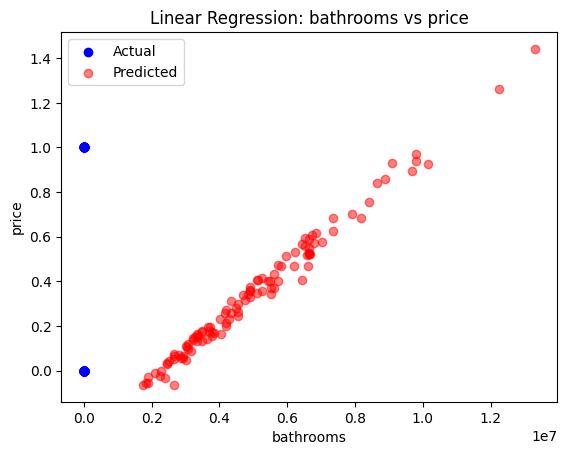


Model Intercept: -0.21620990638034082
Feature Coefficients:
area: -1.2040375042293286e-05
price: 1.4017107953749695e-07
bathrooms: -0.05853760943993181


In [31]:
# Plot regression for one feature (e.g., sqft_living)
plt.scatter(X_test['bathrooms'], y_test, color='blue', label='Actual')
plt.scatter(X_test['price'], y_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.title('Linear Regression: bathrooms vs price')
plt.legend()
plt.show()

# Coefficient interpretation
print("\nModel Intercept:", model.intercept_)
print("Feature Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")